# lets get some RF + PCAs going

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
CARIACO = pd.read_csv("../../DATA/January/Combined_CARIACO_data_v5.csv")
CARIACO['date'] = pd.to_datetime(CARIACO['time_month'])
CARIACO = CARIACO.set_index('date')

In [7]:
CARIACO.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 316 entries, 1995-11-01 to 2021-11-01
Data columns (total 96 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    316 non-null    int64  
 1   cdww                          299 non-null    float64
 2   iews                          299 non-null    float64
 3   inss                          299 non-null    float64
 4   mcc                           299 non-null    float64
 5   mwp                           299 non-null    float64
 6   si10                          299 non-null    float64
 7   sp                            300 non-null    float64
 8   sst                           299 non-null    float64
 9   t2m                           299 non-null    float64
 10  tauoc                         299 non-null    float64
 11  u10                           299 non-null    float64
 12  ust                           300 non-null   

## Create Subframes without NAs

In [8]:
CSUB1 = CARIACO[['u10',
         'sst',
         'mtpr',
         'cdir',
         'e',
         'Satellite_chla',
        ]].dropna()

CSUB1.columns

Index(['u10', 'sst', 'mtpr', 'cdir', 'e', 'Satellite_chla'], dtype='object')

In [6]:
from tslearn.utils import to_time_series

In [7]:
from tslearn.utils import to_time_series_dataset

In [15]:
Sat_chla_TS = to_time_series(CARIACO.Satellite_chla)

In [27]:
CARIACO.columns

Index(['Unnamed: 0', 'cdww', 'iews', 'inss', 'mcc', 'mwp', 'si10', 'sp', 'sst',
       't2m', 'tauoc', 'u10', 'ust', 'v10', 'v10n', 'vst', 'wind',
       'time_month', 'cdir', 'e', 'ewss', 'i10fg', 'lsp', 'magss', 'mer',
       'metss', 'mmtss', 'mntss', 'mtpr', 'nsss', 'sshf', 'tp', 'NO3_UDO',
       'PO4_UDO', 'SiO4_UDO', 'NH4_USF', 'NO2_USF', 'NO3_NO2_USF', 'PO4_USF',
       'SiO4_USF', 'pH_corrected', 'Salinity_bottles', 'Temperature',
       'Sigma_t', 'PrimaryProductivity', 'Chlorophyll', 'Phaeopigments',
       'NO3_USF', 'NO3_UDO_35m', 'PO4_UDO_35m', 'SiO4_UDO_35m', 'NH4_USF_35m',
       'NO2_USF_35m', 'NO3_NO2_USF_35m', 'PO4_USF_35m', 'SiO4_USF_35m',
       'pH_corrected_35m', 'Salinity_bottles_35m', 'Temperature_35m',
       'Sigma_t_35m', 'PrimaryProductivity_35m', 'Chlorophyll_35m',
       'Phaeopigments_35m', 'NO3_USF_35m', 'NO3_UDO_35to100m',
       'PO4_UDO_35to100m', 'SiO4_UDO_35to100m', 'NH4_USF_35to100m',
       'NO2_USF_35to100m', 'NO3_NO2_USF_35to100m', 'PO4_USF_35t

In [32]:
CDROP = CARIACO.drop(['time_month', 'Unnamed: 0'], axis=1)

In [33]:
FullDat_TS = to_time_series_dataset(CDROP)

In [42]:
CSUB1 = CARIACO[['u10',
         'sst',
         'mtpr',
         'cdir',
         'e',
         'Satellite_chla',
        ]].dropna()

CSUB1.columns

WindSat_TS = to_time_series_dataset(CSUB1)

In [47]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesScalerMinMax

MU0_WindSat_TS = TimeSeriesScalerMeanVariance().fit_transform(WindSat_TS)

In [48]:
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=3, metric="dtw")

In [49]:
testfit1 = km.fit(WindSat_TS)
testfit2 = km.fit(MU0_WindSat_TS)

In [52]:
testfit1.cluster_centers_.shape

(3, 6, 1)

In [55]:
km.fit_predict(MU0_WindSat_TS)

array([2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 1, 1, 2, 0, 0, 0, 0])

In [74]:
to_time_series(CARIACO['u10'].values.flatten()).shape

(316, 1)

In [77]:
to_time_series(CARIACO['u10']).shape

(316, 1)

In [109]:
from tslearn.metrics import soft_dtw
x = to_time_series(CSUB1['u10'])
y = to_time_series(CSUB1['sst'])

In [143]:
CSUB1

,u10,sst,mtpr,cdir,e,Satellite_chla
date,,,,,,
1997-10-01,4.285356,301.56662,1.005852e-05,20775168.0,-0.003335,0.231117
1997-11-01,5.422991,299.76318,3.418361e-06,18946864.0,-0.002332,0.638016
1997-12-01,5.722310,298.24844,3.446285e-07,18532112.0,-0.001962,0.918222
1998-01-01,5.920893,297.38370,2.003545e-07,18752416.0,-0.001369,1.245373
1998-02-01,5.456301,297.73834,7.937780e-07,20465568.0,-0.001631,0.596021
...,...,...,...,...,...,...
2020-02-01,6.762988,297.08050,4.660934e-07,20420816.0,-0.001566,3.712125
2020-03-01,6.434934,297.27075,7.341457e-07,22317008.0,-0.001938,0.879067
2020-04-01,6.272203,297.82648,7.874152e-08,22999520.0,-0.001564,0.634276


In [167]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance


scaler = TimeSeriesScalerMeanVariance(mu=0, std=np.pi)
csub_scaled = scaler.fit_transform(CSUB1.transpose())

In [168]:
soft_dtw_score = soft_dtw(csub_scaled[0],csub_scaled[1], gamma=.1)

In [169]:
x = csub_scaled[0]
y = csub_scaled[1]

In [170]:
soft_dtw_score

652.438967453427

In [171]:
from sklearn.metrics import pairwise_distances
from tslearn import metrics

# Example 1 : Length of the arc between two angles on a circle
def arc_length(angle_1, angle_2, r=1.):
    """Length of the arc between two angles (in rad) on a circle of
    radius r.
    """
    # Compute the angle between the two inputs between 0 and 2*pi.
    theta = np.mod(angle_2 - angle_1, 2*np.pi)
    if theta > np.pi:
        theta = theta - 2 * np.pi
    # Return the length of the arc
    L = r * np.abs(theta)
    return(L)

distances_1 = pairwise_distances(
    x, y, metric=arc_length
)

# DTW using a function as the metric argument
path_1, sim_1 = metrics.dtw_path_from_metric(
    x, y, metric=arc_length
)


distances_2 = pairwise_distances(x, y, metric="hamming")

# DTW using one of the options of sklearn.metrics.pairwise_distances
path_2, sim_2 = metrics.dtw_path_from_metric(
    x, y, metric="hamming"
)

In [172]:
distances_1

array([[0.29054763, 2.93644876, 0.11856823, ..., 0.96960205, 1.16971479,
        1.05143184],
       [2.32425009, 0.32165104, 2.73336595, ..., 2.69878554, 2.49867279,
        1.56336588],
       [3.01221975, 0.36631862, 2.8618497 , ..., 2.01081588, 1.81070313,
        2.25133554],
       ...,
       [2.00706325, 1.63022093, 1.59794739, ..., 0.74691357, 0.54680082,
        2.76794746],
       [1.91985547, 1.7174287 , 1.51073962, ..., 0.6597058 , 0.45959305,
        2.68073968],
       [1.67194088, 0.97396025, 2.08105673, ..., 2.93209055, 3.1322033 ,
        0.91105666]])

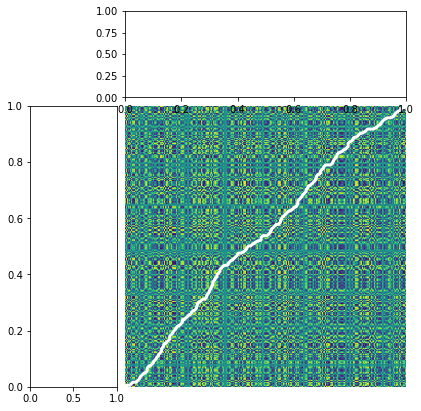

In [173]:
left, bottom = 0.01, 0.1
w_ts = h_ts = 0.2
left_h = left + w_ts + 0.02
width = height = 0.65
bottom_h = bottom + height + 0.02

rect_s_y = [left, bottom, w_ts, height]
rect_dist = [left_h, bottom, width, height]
rect_s_x = [left_h, bottom_h, width, h_ts]

# Plot example 1
plt.figure(1, figsize=(6, 6))
ax_dist = plt.axes(rect_dist)
ax_s_x = plt.axes(rect_s_x)
ax_s_y = plt.axes(rect_s_y)

ax_dist.imshow(distances_1, origin='lower')
ax_dist.axis("off")
ax_dist.autoscale(False)
ax_dist.plot(*zip(*path_1), "w-", linewidth=3.)

# OH SHIT!

In [1]:
import pandas as pd
import numpy as np
from tslearn.clustering import TimeSeriesKMeans, KShape, KernelKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
#from netdata_pandas.data import get_data, get_chart_list
from am4894plots.plots import plot_lines, plot_lines_grid

In [38]:
# inputs
#host = 'london.my-netdata.io' # host running netdata that we want to pull data from
#n = 60*5 # how many seconds of most recent data to pull
n_charts = None # If None then pull data for all charts otherwise sample n_charts randomly
n_clusters = 4 # number of clusters to fit
diff = False # take diffs of the data or not
preprocessing_meanvar = True # True to use TimeSeriesScalerMeanVariance preprocessing
smooth_n = 15 # n observations to smooth over
smooth_func = 'mean' # one of ['mean','min','max','sum']
norm = False # normalize the data to 0-1 range
model = 'kmeans' # one of ['kmeans','kshape','kernelkmeans','dtw']

In [39]:
df = CSUB1

In [40]:
X = df.transpose().values#.transpose().values

if preprocessing_meanvar:
    X = TimeSeriesScalerMeanVariance().fit_transform(X)
    df = pd.DataFrame(X.reshape(df.shape), columns=df.columns, index=df.index)
if model == 'kshape':
    model = KShape(n_clusters=n_clusters, max_iter=10, n_init=2).fit(X)
elif model == 'kmeans':
    model = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", 
                             max_iter=10, n_init=2).fit(X)
elif model == 'dtw':
    model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", 
                             max_iter=5, n_init=2).fit(X)
elif model == 'kernelkmeans':
    model = KernelKMeans(n_clusters=n_clusters, kernel="gak", 
                         max_iter=5, n_init=2).fit(X)
else:
    model = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", 
                             max_iter=10, n_init=2).fit(X)

In [41]:
X

array([[[-0.56798447],
        [ 0.26433149],
        [ 0.48331904],
        ...,
        [ 0.88563164],
        [ 0.91339073],
        [ 0.05669502]],

       [[ 1.52449971],
        [ 0.3667162 ],
        [-0.60572591],
        ...,
        [-0.87661839],
        [-0.94031626],
        [-0.23330332]],

       [[ 0.24350532],
        [-0.59001587],
        [-0.9758532 ],
        ...,
        [-1.00922926],
        [-0.87845385],
        [-0.02984627]],

       [[-0.09531272],
        [-1.28683321],
        [-1.55713044],
        ...,
        [ 1.35431546],
        [ 1.04191268],
        [ 0.65936524]],

       [[-1.50403807],
        [-0.17964066],
        [ 0.30909622],
        ...,
        [ 0.83500264],
        [ 1.61362062],
        [ 1.18755542]],

       [[-0.68825107],
        [-0.28214367],
        [-0.0024823 ],
        ...,
        [-0.28587663],
        [ 0.75371229],
        [-0.65678811]]])

In [42]:
# build helper df to map metrics to their cluster labels
df_cluster = pd.DataFrame(list(zip(df.columns, model.labels_)), columns=['metric', 'cluster'])

# make some helper dictionaries and lists
cluster_metrics_dict = df_cluster.groupby(['cluster'])['metric'].apply(lambda x: [x for x in x]).to_dict()
cluster_len_dict = df_cluster['cluster'].value_counts().to_dict()
clusters_dropped = [cluster for cluster in cluster_len_dict if cluster_len_dict[cluster]==1]
clusters_final = [cluster for cluster in cluster_len_dict if cluster_len_dict[cluster]>1]
clusters_final.sort()

df_cluster.head()

,metric,cluster
0,u10,0
1,sst,1
2,mtpr,1
3,cdir,3
4,e,2


In [43]:
cluster_len_dict

{0: 2, 1: 2, 3: 1, 2: 1}

In [44]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [45]:
for cluster_number in clusters_final:
    # get a rough quality score based on the correlation between metrics in the cluster
    x_corr = df[cluster_metrics_dict[cluster_number]].corr().abs().values
    x_corr_mean = round(x_corr[np.triu_indices(x_corr.shape[0],1)].mean(),2)
    # plot each cluster
    plot_title = f'cluster {cluster_number} (quality={x_corr_mean}, n={cluster_len_dict[cluster_number]})'
    plot_lines(df, cols=cluster_metrics_dict[cluster_number], renderer='colab', theme=None, title=plot_title)